In [1]:
#加工なしデータ×Resnet18モデル×SGD

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import japanize_matplotlib
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from tqdm.notebook import tqdm
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
device = torch.device("cpu")
print(device)

cpu


In [3]:
!git clone https://github.com/makaishi2/pythonlibs.git

from pythonlibs.torch_lib1 import *

print(README)

fatal: destination path 'pythonlibs' already exists and is not an empty directory.
Common Library for PyTorch
Author: M. Akaishi


In [4]:
!tree 加工なし画像

加工なし画像
├── test
│   ├── endo
│   │   ├── endo36.JPG
│   │   ├── endo37.JPG
│   │   ├── endo38.JPG
│   │   ├── endo39.JPG
│   │   ├── endo40.JPG
│   │   ├── endo41.JPG
│   │   ├── endo42.JPG
│   │   ├── endo43.JPG
│   │   ├── endo44.JPG
│   │   ├── endo45.JPG
│   │   ├── endo46.JPG
│   │   ├── endo47.JPG
│   │   ├── endo48.JPG
│   │   ├── endo49.JPG
│   │   └── endo50.JPG
│   ├── kaki
│   │   ├── kaki36.JPG
│   │   ├── kaki37.JPG
│   │   ├── kaki38.JPG
│   │   ├── kaki39.JPG
│   │   ├── kaki40.JPG
│   │   ├── kaki41.JPG
│   │   ├── kaki42.JPG
│   │   ├── kaki43.JPG
│   │   ├── kaki44.JPG
│   │   ├── kaki45.JPG
│   │   ├── kaki46.JPG
│   │   ├── kaki47.JPG
│   │   ├── kaki48.JPG
│   │   ├── kaki49.JPG
│   │   └── kaki50.JPG
│   ├── kubo
│   │   ├── kubo36.JPG
│   │   ├── kubo37.JPG
│   │   ├── kubo38.JPG
│   │   ├── kubo39.JPG
│   │   ├── kubo40.JPG
│   │   ├── kubo41.JPG
│   │   ├── kubo42.JPG
│   │   ├── kubo43.JPG
│   │   ├── kubo44.JPG
│   │   ├── kubo45.JPG
│   │   ├── kubo46.JPG
│ 

In [5]:
test_transform = transforms.Compose([transforms.Resize(224),transforms.CenterCrop(224),
                                     transforms.ToTensor(),transforms.Normalize(0.5, 0.5)])

train_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),  transforms.Resize(224), transforms.CenterCrop(224),
                                      transforms.ToTensor(), transforms.Normalize(0.5, 0.5),
                                      transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)])

In [6]:
data_dir='加工なし画像'

import os
train_dir=os.path.join(data_dir,'train')
test_dir=os.path.join(data_dir,'test')

classes=['endo','kaki','kubo','nagi','yama']

n_output=len(classes)

train_data=datasets.ImageFolder(train_dir,transform=train_transform)
train_data2=datasets.ImageFolder(train_dir,transform=test_transform)
test_data=datasets.ImageFolder(test_dir,transform=test_transform)

In [7]:
print(f' 学習データ:{len(train_data)}件')
print(f' 検証データ:{len(test_data)}件')

 学習データ:175件
 検証データ:75件


In [8]:
batch_size=10

train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)

train_loader2=DataLoader(train_data2,batch_size=175,shuffle=True)

test_loader=DataLoader(test_data,batch_size=batch_size, shuffle=False)

test_loader2=DataLoader(test_data,batch_size=75,shuffle=True)

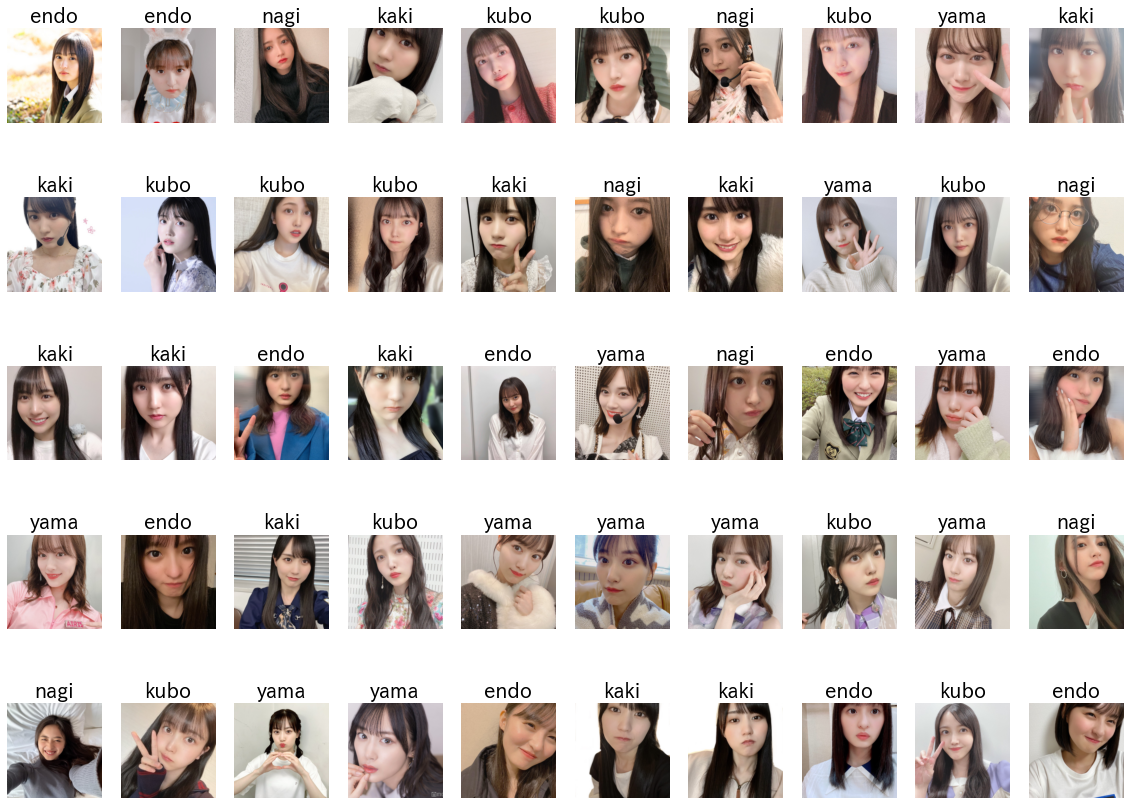

In [9]:
torch_seed()
show_images_labels(train_loader2,classes,None,None)

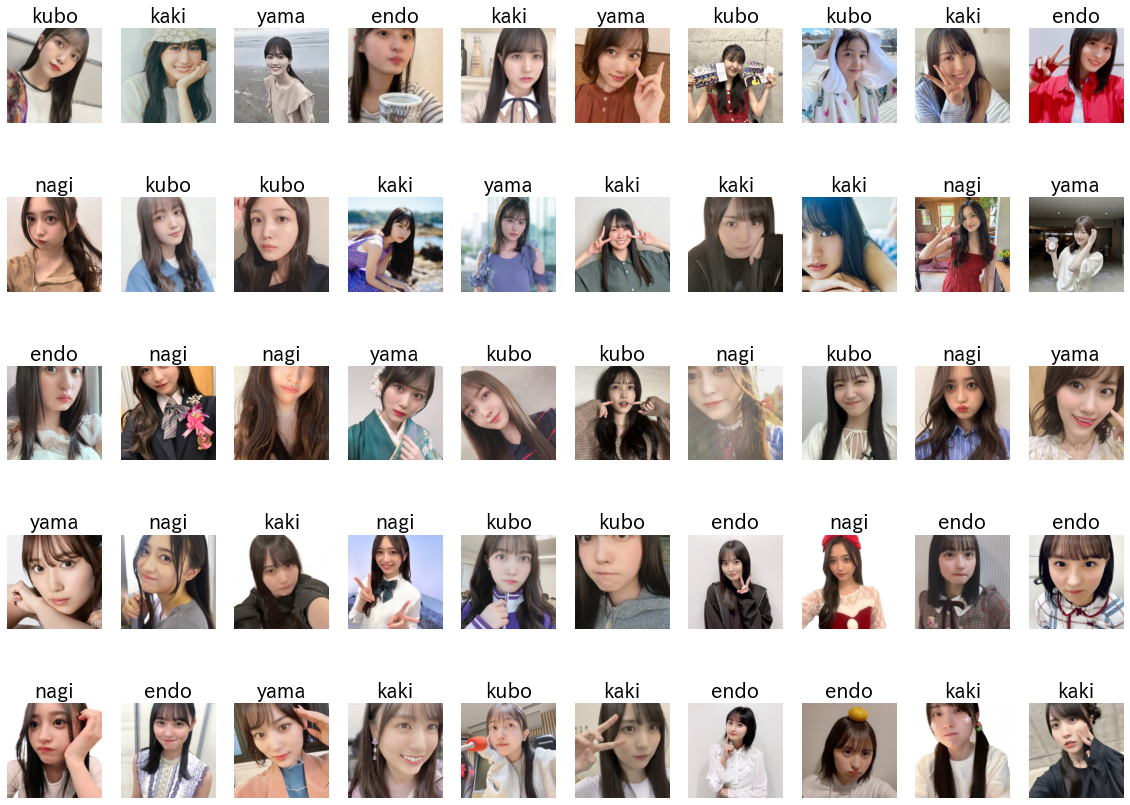

In [10]:
torch_seed()

show_images_labels(test_loader2, classes, None, None)

In [11]:
from torchvision import models
net=models.resnet18(pretrained=True)

torch_seed()

fc_in_features=net.fc.in_features

net.fc=torch.nn.Linear(fc_in_features,n_output)

net=net.to(device)

lr=0.001

criterion=torch.nn.CrossEntropyLoss()

optimizer=optim.SGD(net.parameters(),lr=lr,momentum=0.9)

history = np.zeros((0, 5))

/Users/shige/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shige/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
num_epochs=30

history=fit(net,optimizer,criterion,num_epochs,train_loader,test_loader,device,history)

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [1/30], loss: 1.65584 acc: 0.22286 val_loss: 1.55647, val_acc: 0.30667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [2/30], loss: 1.28235 acc: 0.45143 val_loss: 1.41978, val_acc: 0.37333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [3/30], loss: 0.96459 acc: 0.73143 val_loss: 1.19430, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [4/30], loss: 0.74201 acc: 0.80000 val_loss: 1.12920, val_acc: 0.56000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [5/30], loss: 0.52290 acc: 0.88000 val_loss: 1.14901, val_acc: 0.50667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [6/30], loss: 0.45765 acc: 0.89143 val_loss: 0.98742, val_acc: 0.61333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [7/30], loss: 0.36651 acc: 0.91429 val_loss: 0.92988, val_acc: 0.60000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [8/30], loss: 0.22201 acc: 0.95429 val_loss: 0.85097, val_acc: 0.69333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [9/30], loss: 0.18828 acc: 0.96571 val_loss: 0.83622, val_acc: 0.66667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [10/30], loss: 0.17955 acc: 0.97714 val_loss: 0.84022, val_acc: 0.68000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [11/30], loss: 0.15331 acc: 0.97143 val_loss: 0.80917, val_acc: 0.70667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [12/30], loss: 0.11836 acc: 0.96571 val_loss: 0.80549, val_acc: 0.66667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [13/30], loss: 0.08432 acc: 0.98286 val_loss: 0.79467, val_acc: 0.69333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [14/30], loss: 0.09001 acc: 0.99429 val_loss: 0.76230, val_acc: 0.74667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [15/30], loss: 0.05788 acc: 0.99429 val_loss: 0.78159, val_acc: 0.72000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [16/30], loss: 0.07730 acc: 0.98857 val_loss: 0.72405, val_acc: 0.68000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [17/30], loss: 0.10060 acc: 0.97714 val_loss: 0.73764, val_acc: 0.77333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [18/30], loss: 0.08722 acc: 0.98286 val_loss: 0.65529, val_acc: 0.72000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [19/30], loss: 0.06377 acc: 0.99429 val_loss: 0.68407, val_acc: 0.70667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [20/30], loss: 0.05360 acc: 1.00000 val_loss: 0.75110, val_acc: 0.70667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [21/30], loss: 0.06580 acc: 0.98857 val_loss: 0.70245, val_acc: 0.74667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [22/30], loss: 0.07019 acc: 0.98857 val_loss: 0.68202, val_acc: 0.72000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [23/30], loss: 0.06594 acc: 0.98857 val_loss: 0.74429, val_acc: 0.70667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [24/30], loss: 0.05841 acc: 0.98286 val_loss: 0.66421, val_acc: 0.70667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [25/30], loss: 0.04457 acc: 0.98286 val_loss: 0.70367, val_acc: 0.70667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [26/30], loss: 0.07580 acc: 0.97714 val_loss: 0.72174, val_acc: 0.72000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [27/30], loss: 0.13488 acc: 0.96000 val_loss: 0.78979, val_acc: 0.73333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [28/30], loss: 0.08053 acc: 0.97143 val_loss: 0.78701, val_acc: 0.68000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [29/30], loss: 0.02558 acc: 1.00000 val_loss: 0.70517, val_acc: 0.72000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [30/30], loss: 0.03382 acc: 1.00000 val_loss: 0.66696, val_acc: 0.74667


初期状態: 損失: 1.55647 精度: 0.30667
最終状態: 損失: 0.66696 精度: 0.74667


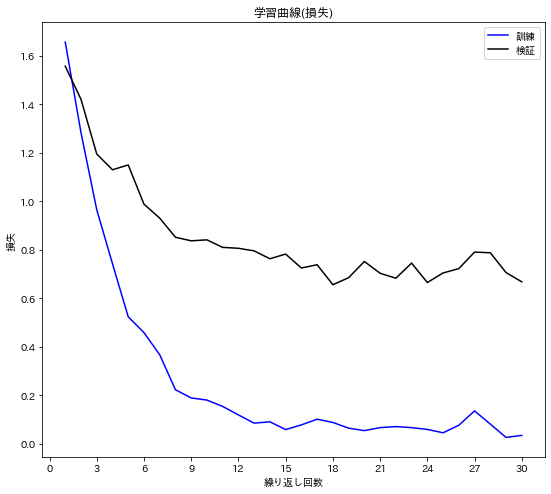

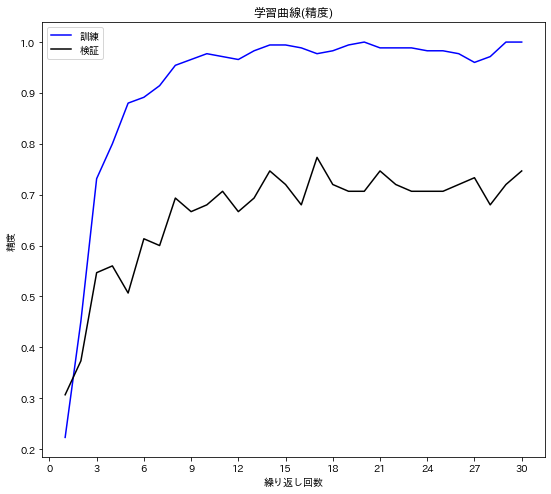

In [13]:
evaluate_history(history)

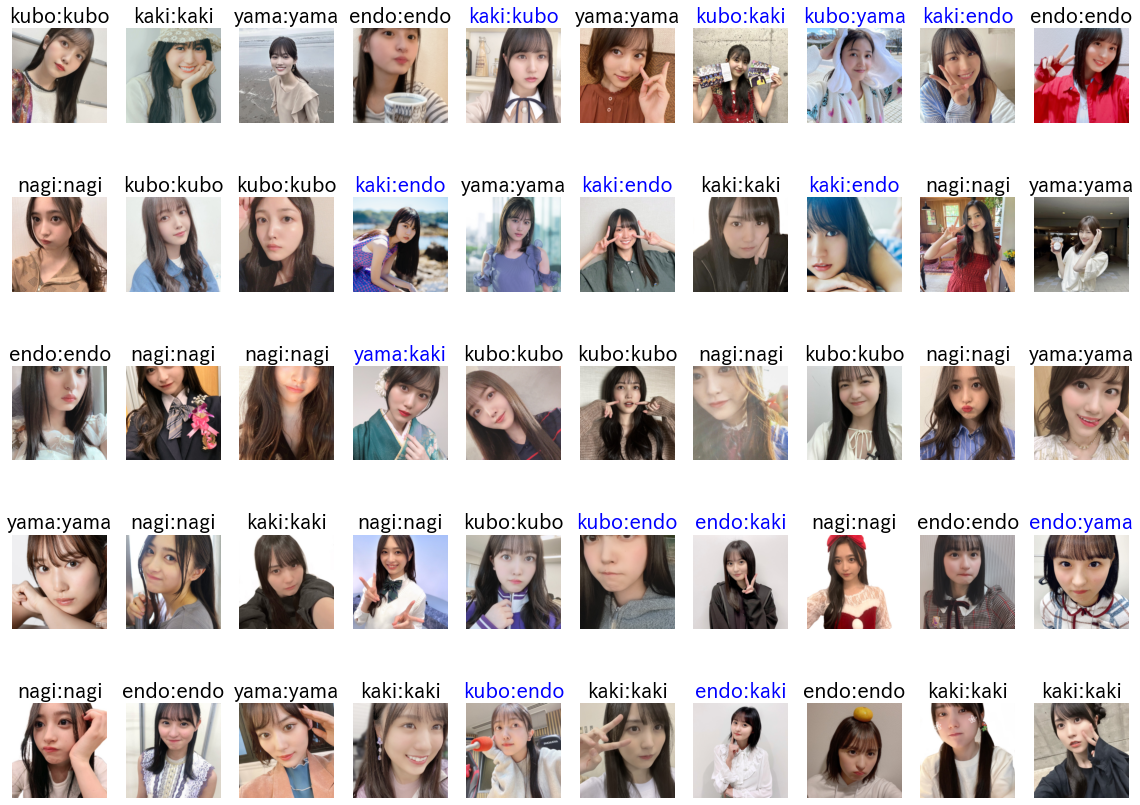

In [14]:
torch_seed()

show_images_labels(test_loader2,classes,net,device)